In [1]:
import pandas as pd

In [2]:
# Load the dataset from a CSV file
df = pd.read_csv('boston_housing.csv')

In [3]:
# Display the first few rows of the dataset
print(df.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [4]:
from sklearn.preprocessing import StandardScaler
# Split the data into input and output variables
X = df.drop('MEDV', axis=1)
y = df['MEDV']

In [5]:
# Scale the input features
scaler = StandardScaler()
scaler.fit_transform(X)
print(X[:5])

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
4  396.90   5.33  


In [6]:
from sklearn.model_selection import train_test_split
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
#Print the shapes of the training and testing sets
print('Training set shape:', X_train.shape, y_train.shape)
print('Testing set shape:', X_test.shape, y_test.shape)

Training set shape: (354, 13) (354,)
Testing set shape: (152, 13) (152,)


In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
# Define the model architecture
model =Sequential()
model.add(Dense(64,input_dim=13,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dense(1))

In [9]:
# Display the model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3009 (11.75 KB)
Trainable params: 3009 (11.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [10]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

In [11]:
from keras.callbacks import EarlyStopping
# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32,callbacks=[early_stopping])

Epoch 1/100


9/9 [==============================] - 1s 35ms/step - loss: 1801.0957 - mean_absolute_error: 32.9534 - val_loss: 1233.4784 - val_mean_absolute_error: 32.1221
Epoch 2/100
9/9 [==============================] - 0s 8ms/step - loss: 966.7351 - mean_absolute_error: 24.9196 - val_loss: 249.6681 - val_mean_absolute_error: 13.1348
Epoch 3/100
9/9 [==============================] - 0s 7ms/step - loss: 854.3986 - mean_absolute_error: 22.5118 - val_loss: 346.8541 - val_mean_absolute_error: 16.3445
Epoch 4/100
9/9 [==============================] - 0s 7ms/step - loss: 619.0740 - mean_absolute_error: 19.3010 - val_loss: 258.2513 - val_mean_absolute_error: 13.6165
Epoch 5/100
9/9 [==============================] - 0s 7ms/step - loss: 404.3034 - mean_absolute_error: 15.9994 - val_loss: 250.8631 - val_mean_absolute_error: 13.3745
Epoch 6/100
9/9 [==============================] - 0s 7ms/step - loss: 356.2799 - mean_absolute_error: 14.3415 - val_loss: 160.9191 - val_mean_absolute_error: 9

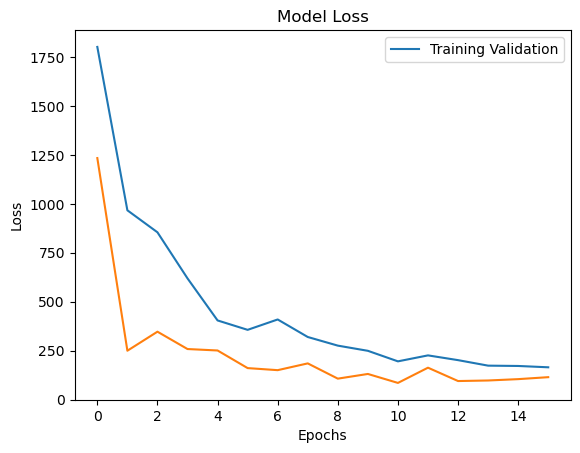

In [12]:
# Plot the training and validation loss over epochs import
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Validation'])
plt.show()

In [13]:
# Evaluate the model on the testing set loss,
mae = model.evaluate (X_test, y_test)

5/5 [==============================] - 0s 6ms/step - loss: 80.8861 - mean_absolute_error: 6.1935


In [14]:
# Print the mean absolute error
print('Mean Absolute Error:', mae)

Mean Absolute Error: [80.8860855102539, 6.193505764007568]
